In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import scipy.stats as stats

In [2]:
data=pd.read_csv('loan_data.csv')

In [3]:
data.head(5)

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

# About Dataset 
## About the data and what to do…

### Publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.

### We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.
### Here are what the columns represent:

#### 1.credit.policy:1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

#### 2.purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").


#### 3.int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.


#### 4.installment: The monthly installments owed by the borrower if the loan is funded.


#### 5.log.annual.inc: The natural log of the self-reported annual income of the borrower.


#### 6.dti:  The debt-to-income ratio of the borrower (amount of debt divided by annual income).


#### 7.fico:The FICO credit score of the borrower.


#### 8.days.with.cr.line: The number of days the borrower has had a credit line.


#### 9.revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).


#### 10.revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).


#### 11.inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.


#### 12.delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.


#### 13.pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).




In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
data.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(9578, 14)

In [9]:
data.drop(['purpose'],axis=1).corr()['not.fully.paid']

credit.policy       -0.158119
int.rate             0.159552
installment          0.049955
log.annual.inc      -0.033439
dti                  0.037362
fico                -0.149666
days.with.cr.line   -0.029237
revol.bal            0.053699
revol.util           0.082088
inq.last.6mths       0.149452
delinq.2yrs          0.008881
pub.rec              0.048634
not.fully.paid       1.000000
Name: not.fully.paid, dtype: float64

Text(0.5, 1.0, 'Target Output Percentage')

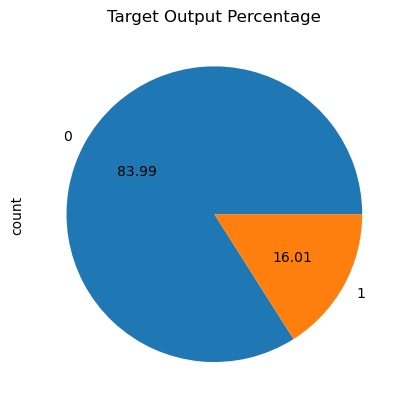

In [10]:
data['not.fully.paid'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Target Output Percentage')

In [11]:
data.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

C:\Users\amanc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


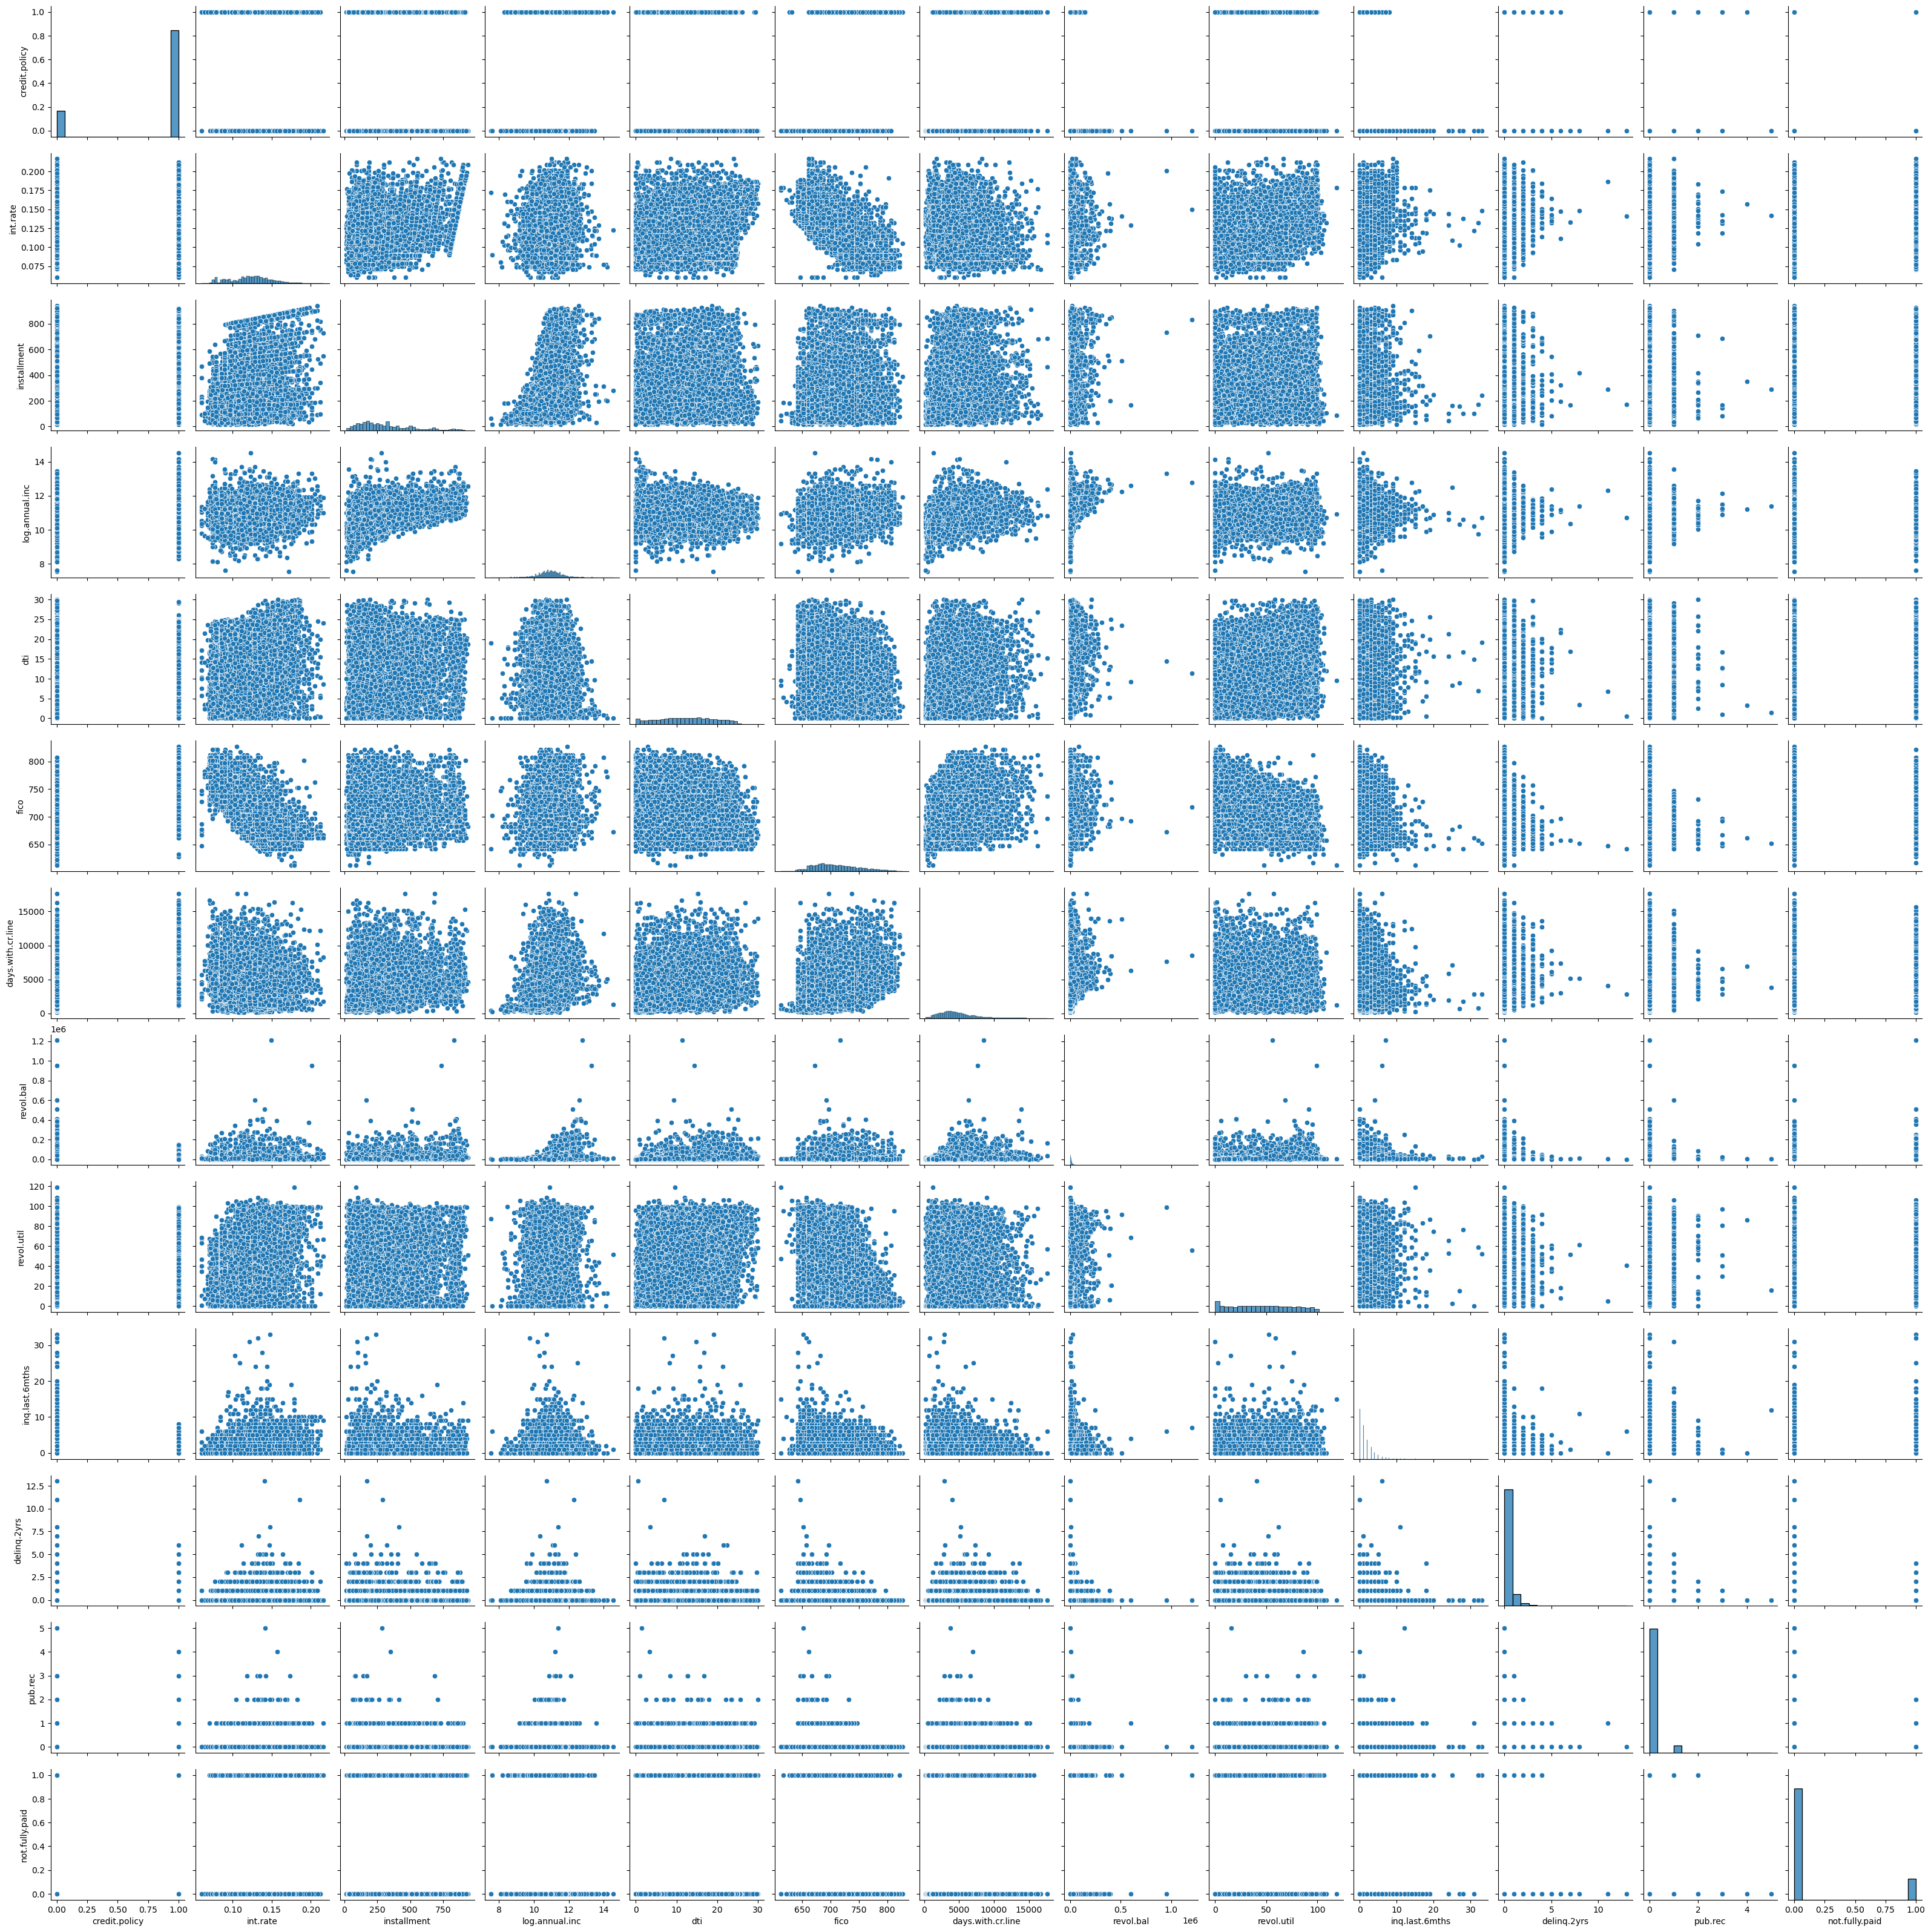

In [12]:
sns.pairplot(data)

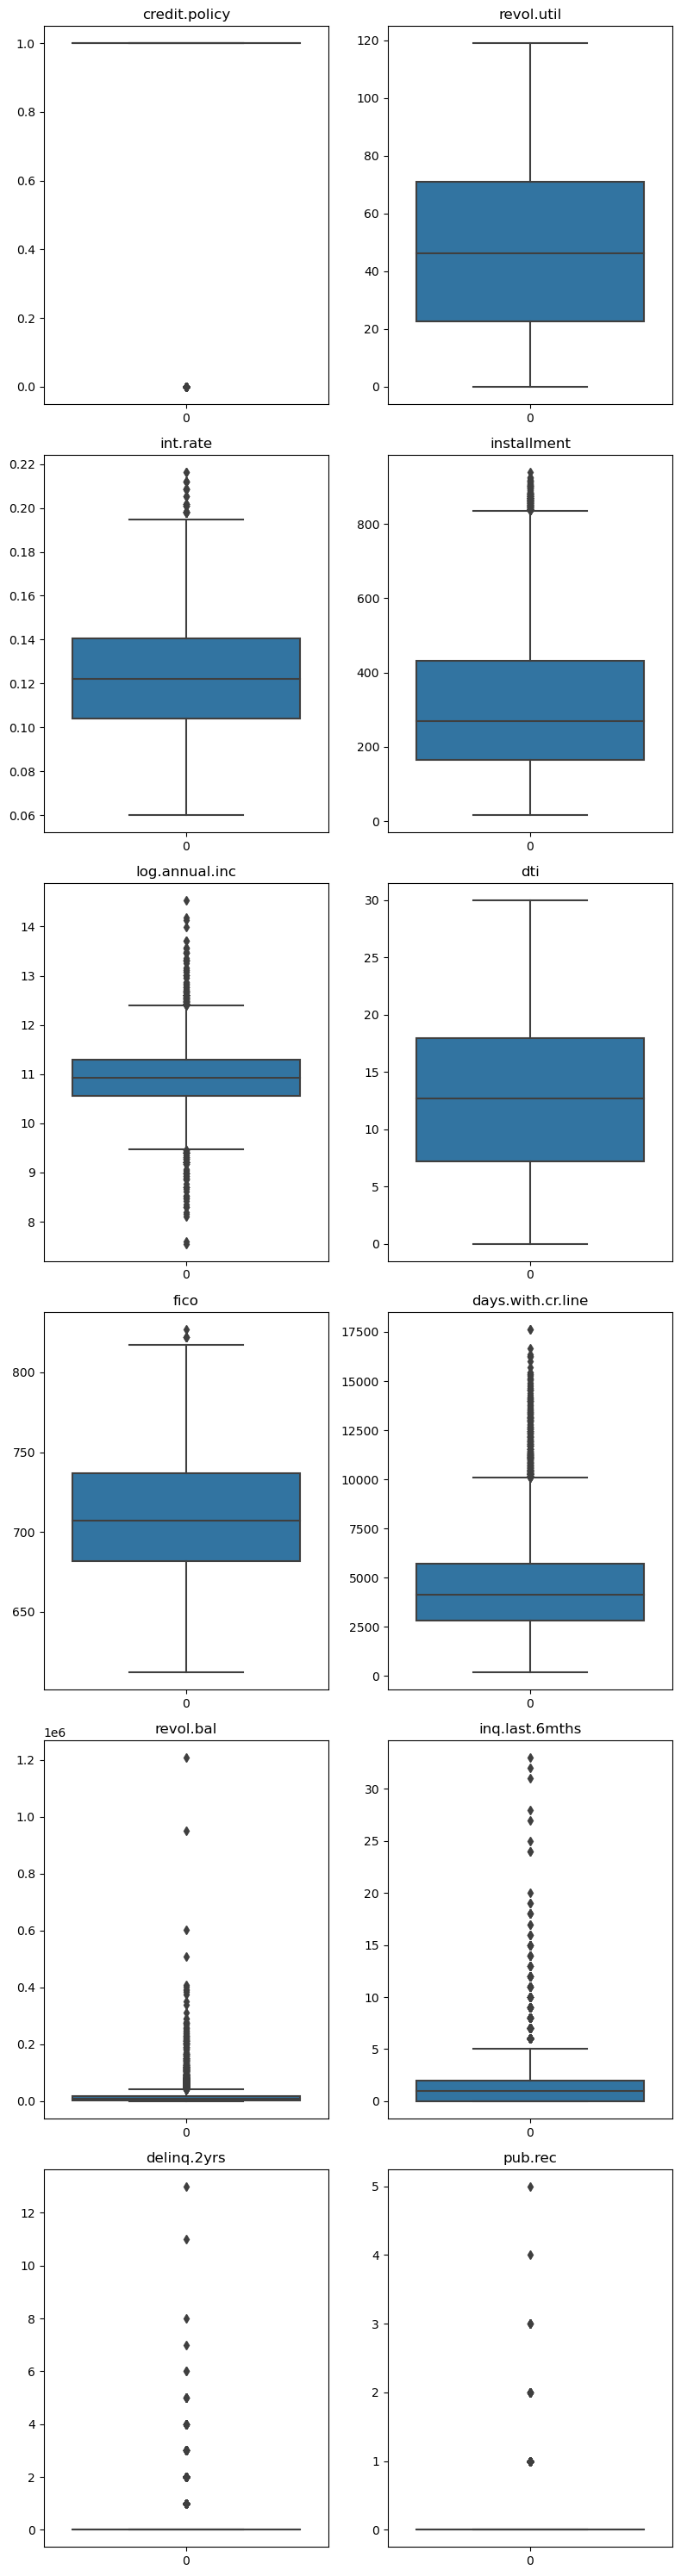

In [13]:
fig, axes = plt.subplots(6, 2, figsize=(8,30))

sns.boxplot(data['credit.policy'],ax=axes[0,0])
axes[0, 0].set_title('credit.policy')


#sns.boxplot(data['purpose'],ax=axes[0,1])
#axes[0, 1].set_title('purpose')


sns.boxplot(data['int.rate'],ax=axes[1,0])
axes[1,0].set_title('int.rate')

#credit.policy	purpose	int.rate	installment	log.annual.inc	dti	fico	days.with.cr.line	revol.bal	
#revol.util	inq.last.6mths	delinq.2yrs	pub.rec	not.fully.paid


sns.boxplot(data['installment'],ax=axes[1,1])
axes[1, 1].set_title('installment')


sns.boxplot(data['log.annual.inc'],ax=axes[2,0])
axes[2, 0].set_title('log.annual.inc')


sns.boxplot(data['dti'],ax=axes[2,1])
axes[2, 1].set_title('dti')

sns.boxplot(data['fico'],ax=axes[3,0])
axes[3, 0].set_title('fico')

sns.boxplot(data['days.with.cr.line'],ax=axes[3,1])
axes[3, 1].set_title('days.with.cr.line')

sns.boxplot(data['revol.bal'],ax=axes[4,0])
axes[4, 0].set_title('revol.bal')


sns.boxplot(data['revol.util'],ax=axes[0,1])
axes[0, 1].set_title('revol.util')


sns.boxplot(data['inq.last.6mths'],ax=axes[4,1])
axes[4, 1].set_title('inq.last.6mths')


sns.boxplot(data['delinq.2yrs'],ax=axes[5,0])
axes[5, 0].set_title('delinq.2yrs')


sns.boxplot(data['pub.rec'],ax=axes[5,1])
axes[5, 1].set_title('pub.rec')

plt.tight_layout()
plt.show()

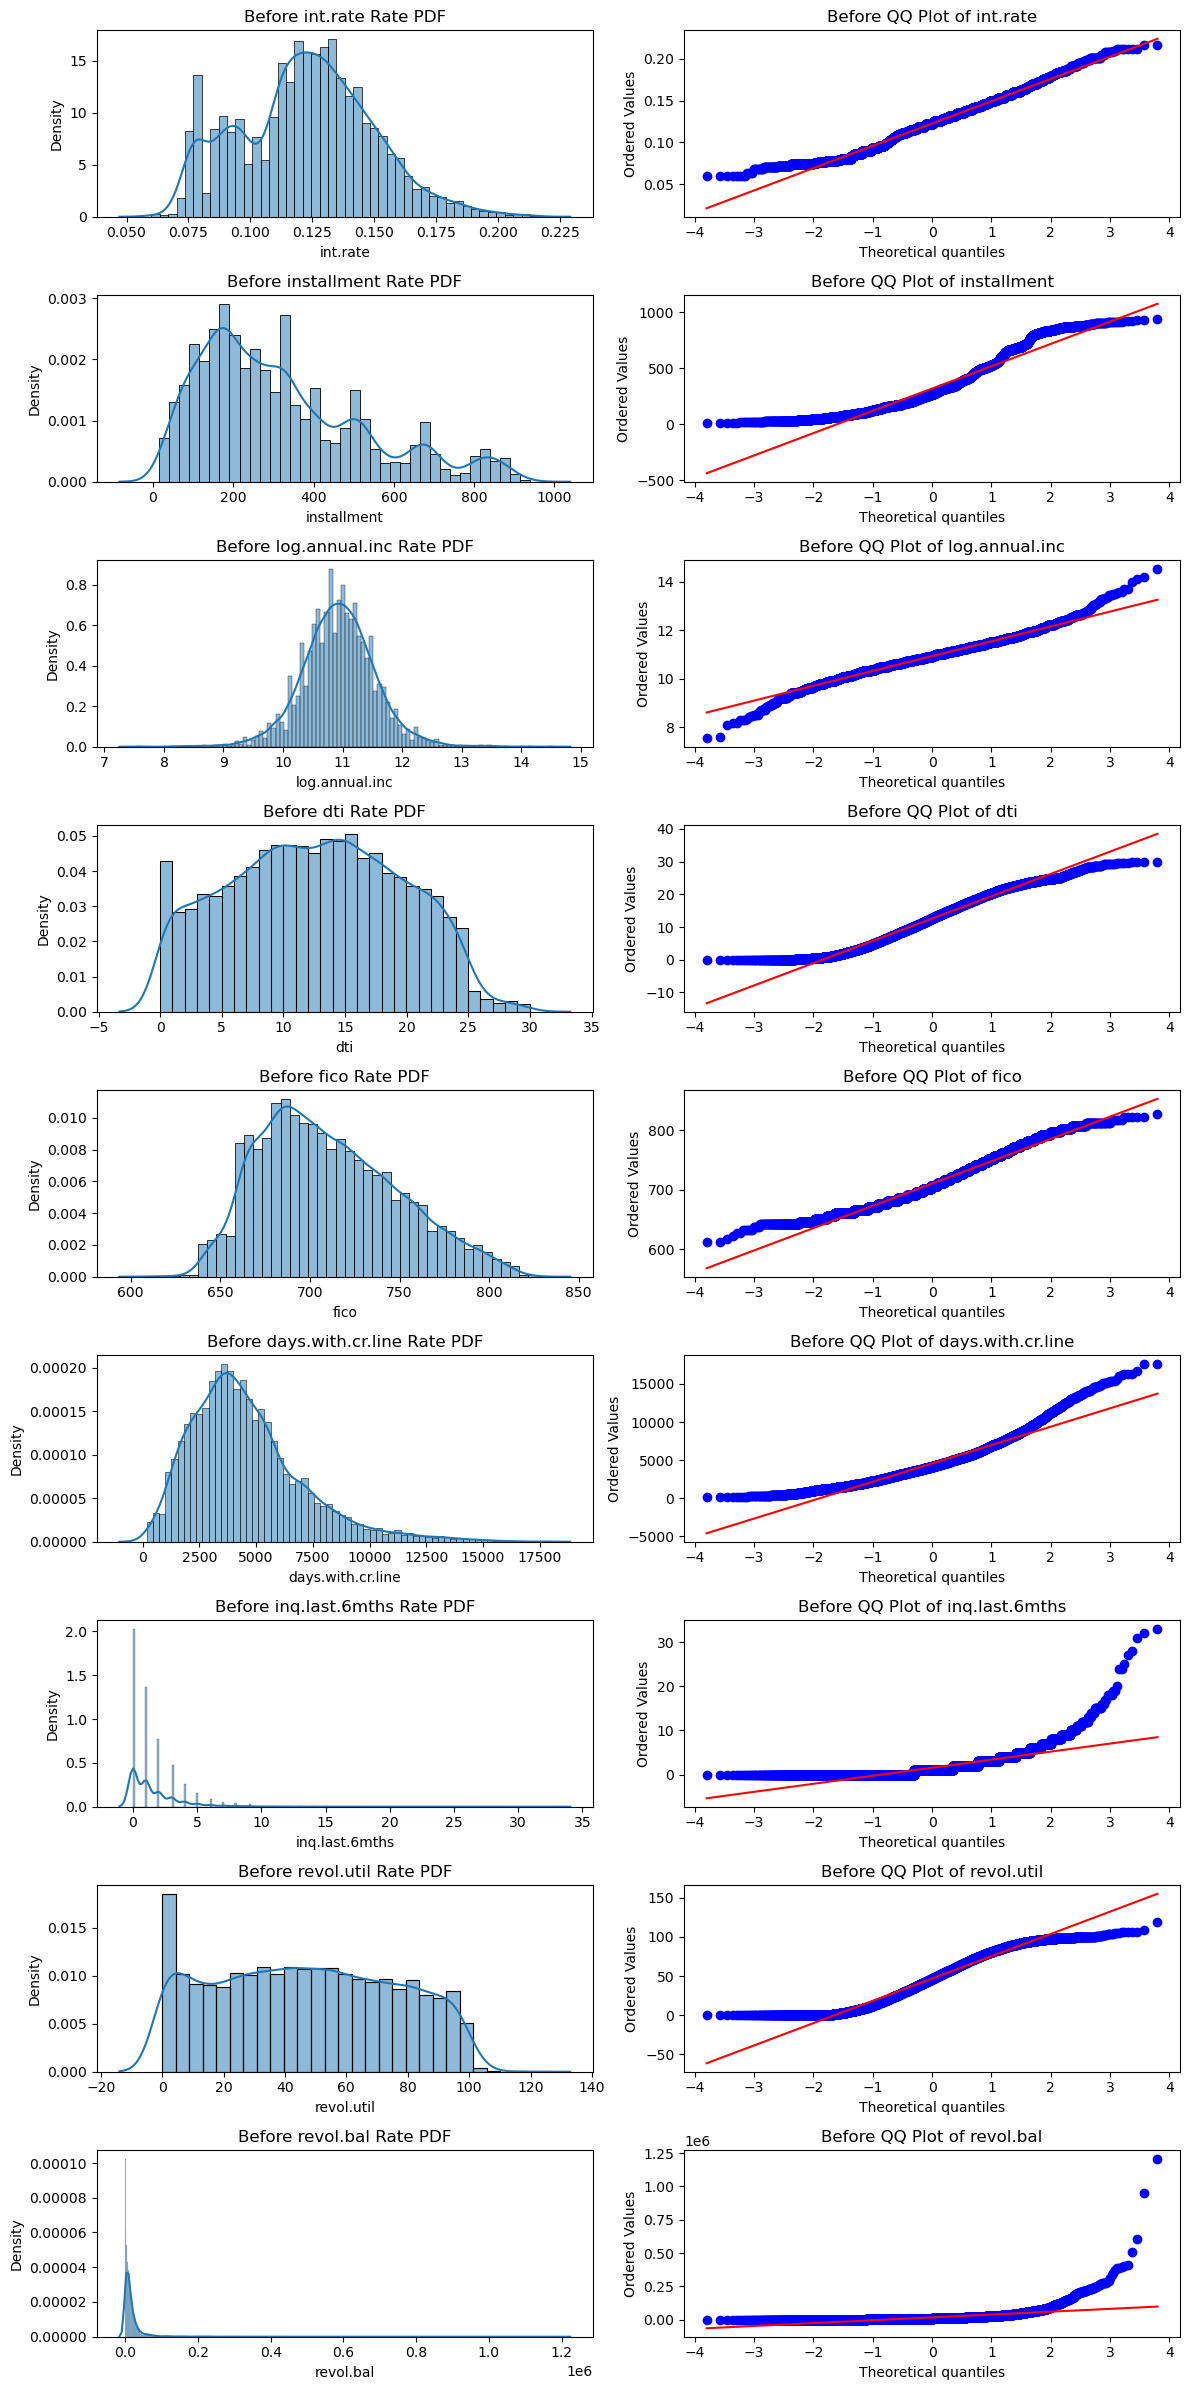

In [14]:
fig, axes = plt.subplots(9, 2, figsize=(12, 24))

sns.histplot(data['int.rate'], ax=axes[0, 0],stat="density", kde=True, kde_kws={"cut": 3})#kde_kws control kde computation
axes[0, 0].set_title('Before int.rate Rate PDF')
stats.probplot(data['int.rate'],dist='norm',plot=axes[0,1])
axes[0, 1].set_title('Before QQ Plot of int.rate')



sns.histplot(data['installment'], ax=axes[1, 0],stat="density", kde=True, kde_kws={"cut": 3})
axes[1, 0].set_title('Before installment Rate PDF')
stats.probplot(data['installment'],dist='norm',plot=axes[1,1])
axes[1, 1].set_title('Before QQ Plot of installment')


sns.histplot(data['log.annual.inc'], ax=axes[2, 0],stat="density", kde=True, kde_kws={"cut": 3})
axes[2, 0].set_title('Before log.annual.inc Rate PDF')
stats.probplot(data['log.annual.inc'],dist='norm',plot=axes[2,1])
axes[2, 1].set_title('Before QQ Plot of log.annual.inc')


sns.histplot(data['dti'], ax=axes[3, 0],stat="density", kde=True, kde_kws={"cut": 3})
axes[3, 0].set_title('Before dti Rate PDF')
stats.probplot(data['dti'],dist='norm',plot=axes[3,1])
axes[3, 1].set_title('Before QQ Plot of dti')


sns.histplot(data['fico'], ax=axes[4, 0],stat="density", kde=True, kde_kws={"cut": 3})
axes[4, 0].set_title('Before fico Rate PDF')
stats.probplot(data['fico'],dist='norm',plot=axes[4,1])
axes[4, 1].set_title('Before QQ Plot of fico')


sns.histplot(data['days.with.cr.line'], ax=axes[5, 0],stat="density", kde=True, kde_kws={"cut": 3})
axes[5, 0].set_title('Before days.with.cr.line Rate PDF')
stats.probplot(data['days.with.cr.line'],dist='norm',plot=axes[5,1])
axes[5, 1].set_title('Before QQ Plot of days.with.cr.line')


sns.histplot(data['inq.last.6mths'], ax=axes[6, 0],stat="density", kde=True, kde_kws={"cut": 3})
axes[6, 0].set_title('Before inq.last.6mths Rate PDF')
stats.probplot(data['inq.last.6mths'],dist='norm',plot=axes[6,1])
axes[6, 1].set_title('Before QQ Plot of inq.last.6mths')

sns.histplot(data['revol.util'], ax=axes[7, 0],stat="density", kde=True, kde_kws={"cut": 3})
axes[7, 0].set_title('Before revol.util Rate PDF')
stats.probplot(data['revol.util'],dist='norm',plot=axes[7,1])
axes[7, 1].set_title('Before QQ Plot of revol.util')

sns.histplot(data['revol.bal'], ax=axes[8, 0],stat="density", kde=True, kde_kws={"cut": 3})
axes[8, 0].set_title('Before revol.bal Rate PDF')
stats.probplot(data['revol.bal'],dist='norm',plot=axes[8,1])
axes[8, 1].set_title('Before QQ Plot of revol.bal')

plt.tight_layout()


plt.show()

Text(0.5, 1.0, 'The number of times the borrower had been 30+ days past due on a payment in the past 2 years.')

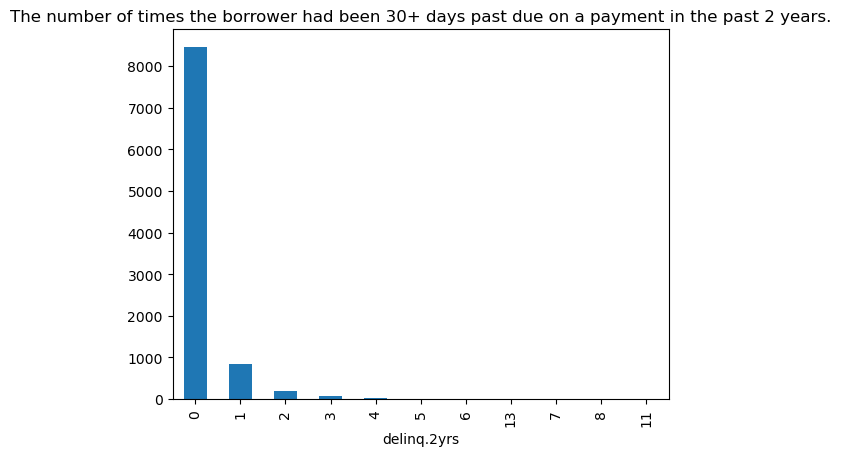

In [15]:
data['delinq.2yrs'].value_counts().plot(kind='bar')
plt.title('The number of times the borrower had been 30+ days past due on a payment in the past 2 years.')

In [16]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer


In [17]:
x_train,x_test,y_train,y_test=train_test_split(data.drop(['not.fully.paid'],axis=1),data['not.fully.paid'],test_size=0.2,random_state=42)

In [18]:
x_train.head(3)

credit.policy             purpose  int.rate  installment  \
7317              1      major_purchase    0.1459       327.42   
350               1         credit_card    0.0838       236.34   
5206              1  debt_consolidation    0.1148       138.47   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
7317        9.994242  11.41   692        5239.041667        144        28.8   
350        11.225243   6.06   742        3149.041667       4286        40.4   
5206       11.170435   6.83   717        3810.000000      11974        72.1   

      inq.last.6mths  delinq.2yrs  pub.rec  
7317               1            0        0  
350                0            0        0  
5206               1            0        0

In [19]:
trf=ColumnTransformer([
    ('pt',PowerTransformer(method='yeo-johnson'),[3,6,7,8])
])

In [20]:
x_train_pt=trf.fit_transform(x_train)
x=pd.DataFrame(x_train_pt,columns=['installment','fico','days.with.cr.line','revol.bal'])
x.head(3)

installment      fico  days.with.cr.line  revol.bal
0     0.281259 -0.428274           0.431421  -1.685561
1    -0.188405  0.868363          -0.463523  -0.385122
2    -0.867532  0.266233          -0.147957   0.264096

In [21]:
x.shape

(7662, 4)

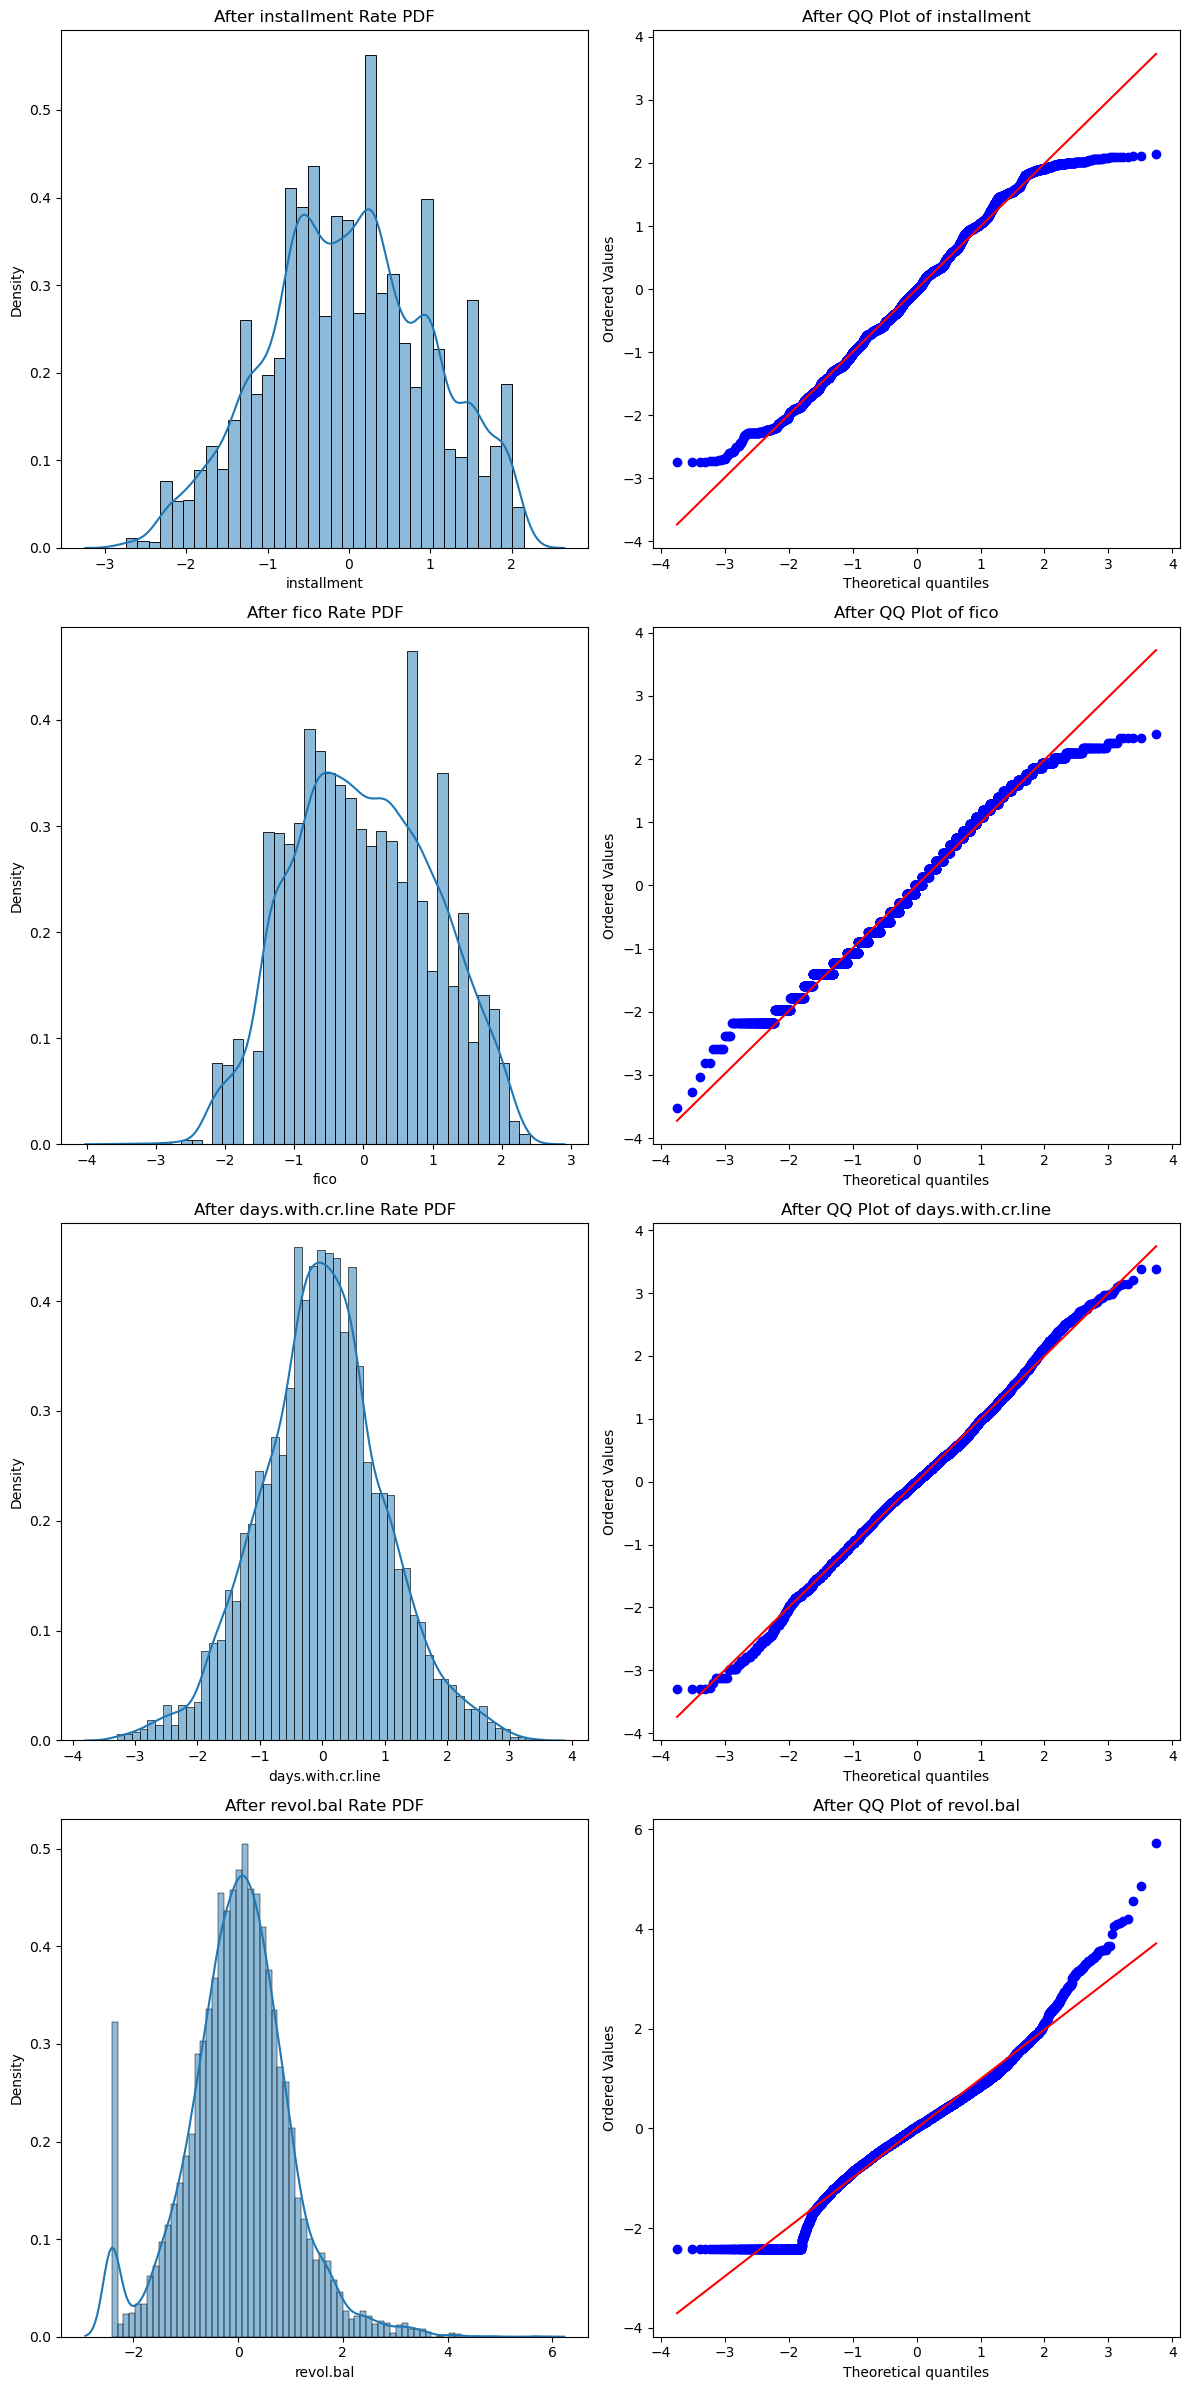

In [22]:
fig,axes=plt.subplots(4,2,figsize=(12,24))

sns.histplot(x['installment'],ax=axes[0,0],stat='density',kde=True,kde_kws={'cut':3})
axes[0, 0].set_title('After installment Rate PDF')
stats.probplot(x['installment'],dist='norm',plot=axes[0,1])
axes[0, 1].set_title('After QQ Plot of installment')


sns.histplot(x['fico'],ax=axes[1,0],stat='density',kde=True,kde_kws={'cut':3})
axes[1, 0].set_title('After fico Rate PDF')
stats.probplot(x['fico'],dist='norm',plot=axes[1,1])
axes[1, 1].set_title('After QQ Plot of fico')


sns.histplot(x['days.with.cr.line'],ax=axes[2,0],stat='density',kde=True,kde_kws={'cut':3})
axes[2, 0].set_title('After days.with.cr.line Rate PDF')
stats.probplot(x['days.with.cr.line'],dist='norm',plot=axes[2,1])
axes[2, 1].set_title('After QQ Plot of days.with.cr.line')


sns.histplot(x['revol.bal'],ax=axes[3,0],stat='density',kde=True,kde_kws={'cut':3})
axes[3, 0].set_title('After revol.bal Rate PDF')
stats.probplot(x['revol.bal'],dist='norm',plot=axes[3,1])
axes[3, 1].set_title('After QQ Plot of revol.bal')


#sns.histplot(x['inq.last.6mths'],ax=axes[4,0],stat='density',kde=True,kde_kws={'cut':3})
#axes[4, 0].set_title('After inq.last.6mths Rate PDF')
#stats.probplot(x['inq.last.6mths'],dist='norm',plot=axes[4,1])
#axes[4, 1].set_title('After QQ Plot of inq.last.6mths')


plt.tight_layout()
plt.show()

In [23]:
trf1=ColumnTransformer([
    ('pt',PowerTransformer(method='yeo-johnson'),[3,6,7,8])
],remainder='passthrough')

In [24]:
# xx=trf1.fit_transform(x_train)
# x1=pd.DataFrame(xx)
# x1

In [25]:
trf2=ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[6])
],remainder='passthrough')

In [26]:
#x3=trf2.fit_transform(x1)
#x2=pd.DataFrame(x3)
#x2

In [27]:
trf3=ColumnTransformer([
    ('scale',StandardScaler(),slice(0,18))
])


In [28]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(trf1,trf2,trf3)

In [29]:
x_train_scale=pipe.fit_transform(x_train)
x_test_scale=pipe.transform(x_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
lr=LogisticRegression(penalty='l2',solver='saga')
lr.fit(x_train_scale,y_train)
y_pred_lr=lr.predict(x_test_scale)
print('Accuracy Score is',accuracy_score(y_test,y_pred_lr))
print('Cross Validation Score is',cross_val_score(lr,x_train_scale,y_train,cv=5,scoring='accuracy').mean())

Accuracy Score is 0.8408141962421712
Cross Validation Score is 0.8397290079521204


In [32]:
tree=DecisionTreeClassifier(min_samples_leaf=25)
tree.fit(x_train_scale,y_train)
y_pred_tree=tree.predict(x_test_scale)
print('Accuracy Score is',accuracy_score(y_test,y_pred_tree))
print('Cross Validation Score is',cross_val_score(tree,x_train_scale,y_train,cv=5,scoring='accuracy').mean())

Accuracy Score is 0.8345511482254697
Cross Validation Score is 0.8258936980851213


In [33]:
svm=SVC(kernel='poly',degree=3)
svm.fit(x_train_scale,y_train)
y_pred_svm=svm.predict(x_test_scale)
print('Accuracy Score is',accuracy_score(y_test,y_pred_svm))
print('Cross Validation Score is',cross_val_score(svm,x_train_scale,y_train,cv=5,scoring='accuracy').mean())

Accuracy Score is 0.837160751565762
Cross Validation Score is 0.8365965299528731


In [34]:
knn=KNeighborsClassifier()
knn.fit(x_train_scale,y_train)
y_pred_knn=knn.predict(x_test_scale)
print('Accuracy Score is',accuracy_score(y_test,y_pred_knn))
print('Cross Validation Score is',cross_val_score(knn,x_train_scale,y_train,cv=5,scoring='accuracy').mean())

Accuracy Score is 0.8256784968684759
Cross Validation Score is 0.8193674751634621


In [67]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(x_train_scale, y_train)
y_pred_xgb = xgb_clf.predict(x_test_scale)

accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)


Accuracy: 0.8241127348643006


In [52]:
from sklearn.ensemble import VotingClassifier

estimator=[('lr',lr),('tree',tree),('svm',svm),('knn',knn),('xgb',xgb_clf)]
vc=VotingClassifier(estimators=estimator,voting='hard',n_jobs=-1)

In [53]:
vc.fit(x_train_scale,y_train)
y_pred_vc=vc.predict(x_test_scale)


In [54]:
accuracy_score(y_test,y_pred_vc)

0.8413361169102297

In [55]:
print('Cross Validation Score is',cross_val_score(vc,x_train_scale,y_train,cv=5,scoring='accuracy').mean())

Cross Validation Score is 0.838815169832016


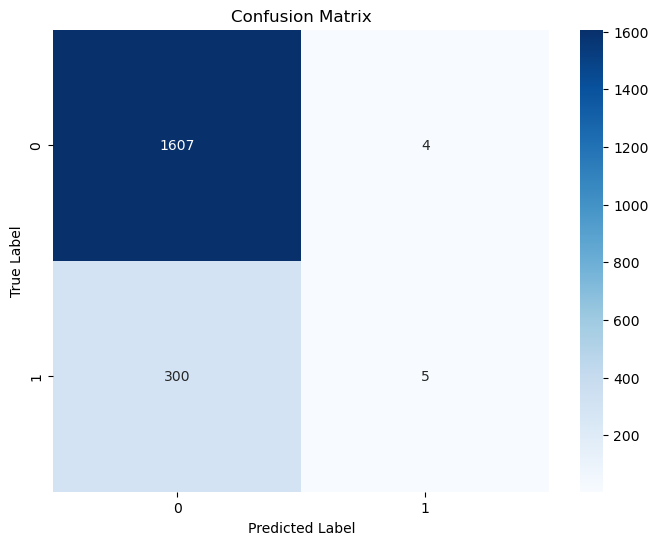

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.56      0.02      0.03       305

    accuracy                           0.84      1916
   macro avg       0.70      0.51      0.47      1916
weighted avg       0.80      0.84      0.77      1916



In [56]:
from sklearn.metrics import classification_report , confusion_matrix


cm = confusion_matrix(y_test, y_pred_vc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

cr = classification_report(y_test, y_pred_vc)
print("Classification Report:")
print(cr)

In [59]:
from sklearn.ensemble import RandomForestClassifier
rrc=RandomForestClassifier(n_estimators=100)
rrc.fit(x_train_scale,y_train)
y_pred_rrc=rrc.predict(x_test_scale)
print('Accuracy Score is',accuracy_score(y_test,y_pred_rrc))
print('Cross Validation Score is',cross_val_score(rrc,x_train_scale,y_train,cv=5,scoring='accuracy').mean())

Accuracy Score is 0.8397703549060542
Cross Validation Score is 0.8367267376209041


In [60]:
from sklearn.ensemble import BaggingClassifier
#estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, 
#bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0

In [61]:
bc=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,n_jobs=-1)

In [62]:
bc.fit(x_train_scale,y_train)
y_pred_bc=bc.predict(x_test_scale)
print('Accuracy Score is',accuracy_score(y_test,y_pred_bc))
print('Cross Validation Score is',cross_val_score(bc,x_train_scale,y_train,cv=5,scoring='accuracy').mean())

Accuracy Score is 0.8382045929018789
Cross Validation Score is 0.8364658113325805


In [63]:
from sklearn.ensemble import StackingClassifier
#estimators, final_estimator=None, *, cv=None, stack_method='auto', n_jobs=None, passthrough=False, verbose=0
sc=StackingClassifier(estimators=estimator,final_estimator=LogisticRegression(),cv=10,n_jobs=-1)

sc.fit(x_train_scale,y_train)
y_pred_sc=sc.predict(x_test_scale)
print('Accuracy Score is',accuracy_score(y_test,y_pred_sc))


Accuracy Score is 0.8402922755741128


In [64]:
print('Cross Validation Score is',cross_val_score(sc,x_train_scale,y_train,cv=5,scoring='accuracy').mean())

Cross Validation Score is 0.8395984596492483
